# 1. Install Dependencies and Setup

In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\harsh\AppData\Local\Temp\pip-install-3h7njg79\tensorflow-gpu_bf780a4796b64f74816913ada34a60ad\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [2]:
pip uninstall tensorflow-gpu tensorflow-intel

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install Augmentor

In [1]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Augmentor                     0.2.12
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakre

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
pip install opencv-python

# 2. Augment image

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [12]:
print("Full path:", path)

Full path: E:\Research\data\train\1\


In [15]:
import os
import Augmentor

# Define the base directory where the subfolders are located
base_directory = r'E:\Research\data\train'

# Loop through all 15 folders
for i in range(1, 16):
    # Define the path for the current folder using os.path.join
    folder_name = str(i)
    folder_path = os.path.join(base_directory, folder_name)
    
    # Check if the folder exists
    if os.path.exists(folder_path):
        # Create an Augmentor pipeline for image augmentation
        p = Augmentor.Pipeline(folder_path)
        
        # Add augmentation operations as needed
        p.zoom(probability=0.6, min_factor=0.75, max_factor=1)
        p.flip_top_bottom(probability=0.5)
        p.flip_left_right(probability=0.5)
        p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
        p.rotate_random_90(probability=1)
        p.random_brightness(probability=0.5, min_factor=0.4, max_factor=0.9)
        p.random_distortion(probability=0.5, grid_width=7, grid_height=8, magnitude=9)
        p.random_erasing(probability=0.3, rectangle_area=0.2)
        
        # Sample the augmented images (generate 150 augmented images for each folder)
        p.sample(150)
    else:
        print(f"Folder {folder_name} does not exist at {folder_path}")


Initialised with 5036 image(s) found.
Output directory set to E:\Research\data\train\1\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E24BA740>: 100%|██████████| 150/150 [00:02<00:00, 64.11 Samples/s]


Initialised with 5000 image(s) found.
Output directory set to E:\Research\data\train\2\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E1F40190>: 100%|██████████| 150/150 [00:01<00:00, 133.90 Samples/s]


Initialised with 5250 image(s) found.
Output directory set to E:\Research\data\train\3\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E24BADA0>: 100%|██████████| 150/150 [00:01<00:00, 88.60 Samples/s] 


Initialised with 5244 image(s) found.
Output directory set to E:\Research\data\train\4\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E27982E0>: 100%|██████████| 150/150 [00:01<00:00, 86.76 Samples/s] 


Initialised with 4250 image(s) found.
Output directory set to E:\Research\data\train\5\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E248B520>: 100%|██████████| 150/150 [00:01<00:00, 121.72 Samples/s]


Initialised with 4000 image(s) found.
Output directory set to E:\Research\data\train\6\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E2441750>: 100%|██████████| 150/150 [00:02<00:00, 59.42 Samples/s]


Initialised with 1250 image(s) found.
Output directory set to E:\Research\data\train\7\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E2BA9150>: 100%|██████████| 150/150 [00:01<00:00, 128.28 Samples/s]


Initialised with 4250 image(s) found.
Output directory set to E:\Research\data\train\8\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E24403A0>: 100%|██████████| 150/150 [00:01<00:00, 110.54 Samples/s]


Initialised with 5588 image(s) found.
Output directory set to E:\Research\data\train\9\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E2639840>: 100%|██████████| 150/150 [00:01<00:00, 98.56 Samples/s] 


Initialised with 5388 image(s) found.
Output directory set to E:\Research\data\train\10\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E2AFFAF0>: 100%|██████████| 150/150 [00:00<00:00, 157.11 Samples/s]


Initialised with 6250 image(s) found.
Output directory set to E:\Research\data\train\11\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E2AFE620>: 100%|██████████| 150/150 [00:00<00:00, 203.01 Samples/s]


Initialised with 250 image(s) found.
Output directory set to E:\Research\data\train\12\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E29B2200>: 100%|██████████| 150/150 [00:00<00:00, 161.98 Samples/s]


Initialised with 5713 image(s) found.
Output directory set to E:\Research\data\train\13\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E2AFE230>: 100%|██████████| 150/150 [00:01<00:00, 75.22 Samples/s]  


Initialised with 4566 image(s) found.
Output directory set to E:\Research\data\train\14\output.

Processing <PIL.Image.Image image mode=RGB size=120x120 at 0x1D2E29B0E80>: 100%|██████████| 150/150 [00:01<00:00, 90.23 Samples/s] 


Initialised with 3500 image(s) found.
Output directory set to E:\Research\data\train\15\output.

Processing <PIL.Image.Image image mode=L size=120x120 at 0x1D2E2440160>: 100%|██████████| 150/150 [00:01<00:00, 75.08 Samples/s]


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the root directory containing subfolders for each image class
data_dir = 'E:\Research\data'
batch_size = 32
image_size = (224, 224)  # Adjust the size as needed

# Use the ImageDataGenerator to load and preprocess images
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',  # Specify 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation',  # Specify 'validation' to create the validation dataset
    shuffle=False,  # Do not shuffle the validation data
)

# Optionally, you can create a test dataset in a similar way
# test_data = datagen.flow_from_directory(
#     'test_data_dir',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',  # Use 'categorical' for multi-class classification
#     shuffle=False,  # Do not shuffle the test data
# )

# You can now use train_data and val_data for training and validation in your machine learning model.


Found 54228 images belonging to 2 classes.
Found 13557 images belonging to 2 classes.


In [ ]:
pip install Augmentor

In [17]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [20]:
import os
import cv2
import imghdr

data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Iterate through all subfolders in the data directory
for root, dirs, files in os.walk(data_dir):
    for image in files:
        image_path = os.path.join(root, image)
        
        try:
            img = cv2.imread(image_path)
            
            if img is not None:
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list: {}'.format(image_path))
                    os.remove(image_path)
            else:
                print('Failed to read image: {}'.format(image_path))
                # Handle the case where the image could not be read
        except Exception as e:
            print('Issue with image: {}'.format(image_path))
            

Failed to read image: data\my_model.h5
Failed to read image: data\train (2).zip
Failed to read image: data\train.zip
Failed to read image: data\try 1.ipynb
Failed to read image: data\logs\train\events.out.tfevents.1695491673.HB.13088.0.v2
Failed to read image: data\logs\train\events.out.tfevents.1695659014.HB.21084.0.v2
Failed to read image: data\logs\validation\events.out.tfevents.1695493279.HB.13088.1.v2


# 3. Load Data

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 67785 files belonging to 2 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

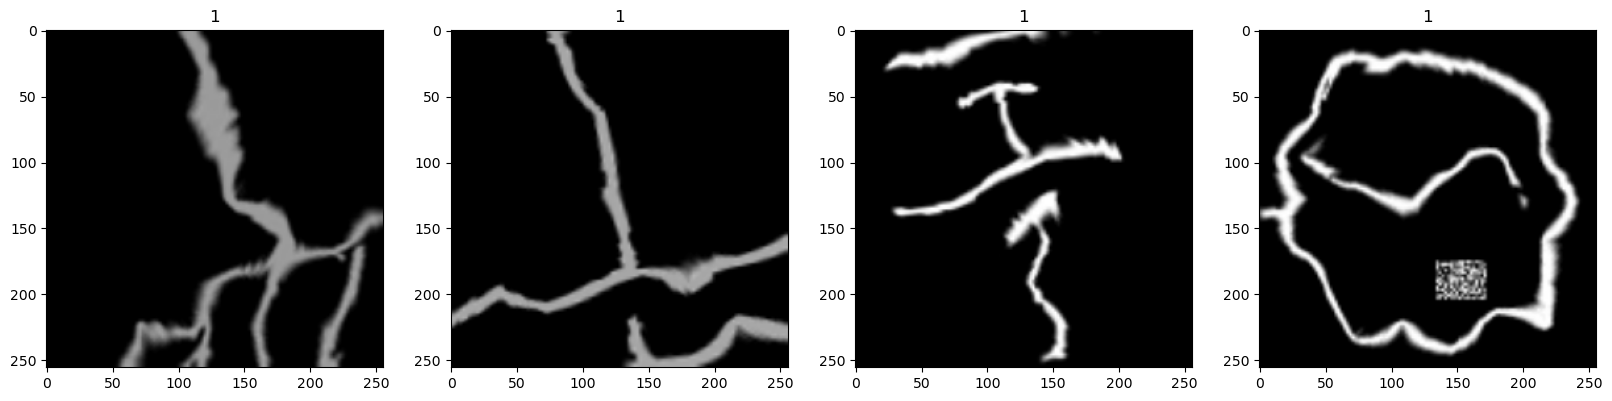

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

# 5. Split Data

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [29]:
train_size

1483

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
# Save the model to a file
model.save('my_model.h5')

d:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Define the model file name
model_file_name = 'my_model.h5'

# Create the full path to the model file
model_path = os.path.join(current_directory, model_file_name)

# Display the full path
print(f"Full path to the model file: {model_path}")

Full path to the model file: e:\Research\my_model.h5


In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])  

Epoch 1/10
1483/1483 [==============================] - 1920s 1s/step - loss: 5.0789e-04 - accuracy: 0.9999 - val_loss: 7.0392e-22 - val_accuracy: 1.0000
Epoch 2/10
1483/1483 [==============================] - 1579s 1s/step - loss: 3.0115e-22 - accuracy: 1.0000 - val_loss: 7.0350e-22 - val_accuracy: 1.0000
Epoch 3/10
1483/1483 [==============================] - 3048s 2s/step - loss: 3.0115e-22 - accuracy: 1.0000 - val_loss: 7.0349e-22 - val_accuracy: 1.0000
Epoch 4/10
1483/1483 [==============================] - 2027s 1s/step - loss: 3.0115e-22 - accuracy: 1.0000 - val_loss: 7.0349e-22 - val_accuracy: 1.0000
Epoch 5/10
1483/1483 [==============================] - 7863s 5s/step - loss: 3.0115e-22 - accuracy: 1.0000 - val_loss: 7.0392e-22 - val_accuracy: 1.0000
Epoch 6/10
1483/1483 [==============================] - 2400s 2s/step - loss: 3.0115e-22 - accuracy: 1.0000 - val_loss: 7.0349e-22 - val_accuracy: 1.0000
Epoch 7/10
1483/1483 [==============================] - 4148s 3s/step - loss

# 8. Plot Performance

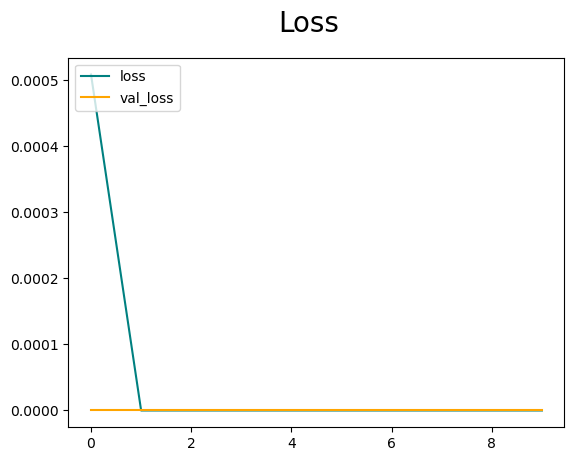

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

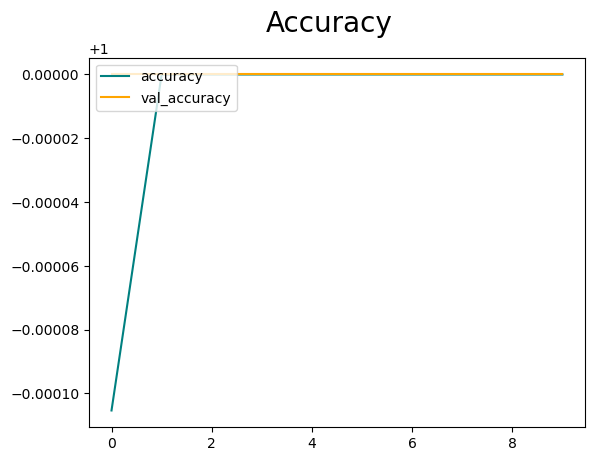

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 263ms/step


In [47]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [48]:
import cv2

In [54]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'E:\Research\test\1\16.bmp'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is not None:
    # Convert the image from BGR to RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.show()
else:
    print(f"Failed to load the image at path: {image_path}")

Failed to load the image at path: E:\Research	est.bmp


In [55]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'E:\Research\test\1\16.bmp'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is not None:
    # Resize the image using TensorFlow
    resize = tf.image.resize(img, (256, 256))
    
    # Convert the resized image to NumPy array and cast it to int for display
    resized_image = resize.numpy().astype(int)
    
    # Display the resized image
    plt.imshow(resized_image)
    plt.show()
else:
    print(f"Failed to load the image at path: {image_path}")

Failed to load the image at path: E:\Research	est.bmp


In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

NameError: name 'resize' is not defined

In [52]:
yhat

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [56]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load your trained model
model_path = 'e:\\Research\\my_model.h5'  
model = tf.keras.models.load_model(model_path)

# Define the path to the folder containing BMP images for prediction
folder_path = 'E:\Research\\test' 

# Define the image size expected by your model
image_size = (256, 256)

# Create a list of folder names from 1 to 15
folder_names = [str(i) for i in range(1, 16)]

# Function to check if a file has a .bmp extension
def is_bmp_file(filename):
    return filename.lower().endswith('.bmp')

# Iterate through the images in the folder
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    
    # Check if the file is a BMP image
    if is_bmp_file(filename):
        # Load the BMP image with error handling
        img = cv2.imread(image_path)
        
        if img is not None:
            # Resize and preprocess the image
            img = cv2.resize(img, image_size)
            img = img / 255.0  # Normalize pixel values to [0, 1]
            img = np.expand_dims(img, axis=0)  # Add batch dimension
            
            # Make a prediction using the model
            predictions = model.predict(img)
            
            # Get the predicted folder number as the index of the highest probability
            predicted_folder_index = np.argmax(predictions)
            
            # Get the predicted folder name
            predicted_folder_name = folder_names[predicted_folder_index]
            
            # Display the predicted folder number and name
            print(f'Image {filename}: Predicted folder number is {predicted_folder_name}')
            print(f'Predictions: {predictions}')
        else:
            print(f'Failed to load image {filename}')
    else:
        print(f'Skipping non-BMP file: {filename}')


Skipping non-BMP file: 1
Skipping non-BMP file: 10
Skipping non-BMP file: 11
Skipping non-BMP file: 12
Skipping non-BMP file: 13
Skipping non-BMP file: 14
Skipping non-BMP file: 15
Skipping non-BMP file: 2
Skipping non-BMP file: 3
Skipping non-BMP file: 4
Skipping non-BMP file: 5
Skipping non-BMP file: 6
Skipping non-BMP file: 7
Skipping non-BMP file: 8
Skipping non-BMP file: 9


In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf

In [58]:
import random

In [60]:
import os
import cv2
import numpy as np
import random  # Import the random module
import tensorflow as tf

# Load your trained model (replace with your model path)
model_path = 'e:\\Research\\my_model.h5'
model = tf.keras.models.load_model(model_path)

# Define the path to the folder containing BMP images for prediction
train_data_dir = 'E:\\Research\\data\\train'  
test_data_dir = 'E:\\Research\\test'  

# Assuming class indices start from 1 to 15
num_classes = 15
folder_names = [str(i) for i in range(1, num_classes + 1)]

# Function to check if a file has a .bmp extension
def is_bmp_file(filename):
    return filename.lower().endswith('.bmp')

# Function to load and preprocess a BMP image
def preprocess_bmp_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, target_size)  # Resize to match model input size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        return img
    else:
        return None

# Load the training data using tf.keras.utils.image_dataset_from_directory
image_size = (256, 256)
batch_size = 32
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    labels='inferred',  # This option assumes that subfolder names are the class labels
)

# Randomly select a folder from the available classes
selected_folder_index = random.randint(0, num_classes - 1)
selected_folder = folder_names[selected_folder_index]

# Print the selected folder for debugging
print(f"Selected Folder: {selected_folder}")

# Get the folder path for the selected class
selected_folder_path = os.path.join(train_data_dir, selected_folder)

# Get a list of BMP images in the selected folder
training_images = [f for f in os.listdir(selected_folder_path) if is_bmp_file(f)]

if training_images:
    selected_image_filename = random.choice(training_images)
    selected_image_path = os.path.join(selected_folder_path, selected_image_filename)

    # Print class names and indices for debugging
    print("Class Names:", train_data.class_names)

    # Print the selected image filename for debugging
    print(f"Selected Image Filename: {selected_image_filename}")

    # Preprocess the selected BMP image
    selected_image = preprocess_bmp_image(selected_image_path, target_size=image_size)

    if selected_image is not None:
        # Make predictions using the selected image
        predictions = model.predict(selected_image)

        # Get the predicted folder number as the index of the highest probability
        predicted_folder_index = np.argmax(predictions)

        # Get the predicted folder name based on class indices
        predicted_folder_name = folder_names[predicted_folder_index]

        # Display the selected image, predicted folder number, and predictions
        cv2.imshow("Selected Image", cv2.imread(selected_image_path))
        print(f'Selected Image: {selected_image_filename}')
        print(f'Predicted folder index: {predicted_folder_index}')
        print(f'Predicted folder name: {predicted_folder_name}')
        print(f'Predictions: {predictions}')
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print(f'Failed to load image {selected_image_filename}')
else:
    print(f'No images found in folder {selected_folder}')


Found 67785 files belonging to 15 classes.
Selected Folder: 13
Class Names: ['1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9']
Selected Image Filename: 14798.bmp
1/1 [==============================] - 1s 1s/step
Selected Image: 14798.bmp
Predicted folder index: 0
Predicted folder name: 1
Predictions: [[0.5036003]]


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

d:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('e:\\Research\\my_model.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 297ms/step


array([[0.99999136]], dtype=float32)